In [1]:
# 미리 정해진 갯수의 모형을 사용하지 않고
# 하나의 모형에서 시작하여 개별 모형을 하나씩 추가하는 방법
# 다수결 방법이 아닌 개별 모형의 출력에 가중치를 조합한 값을 판별함수로 사용
# pima indian 당뇨병 데이터셋
# https://www.kaggle.com/jitenderranga/diabetes-detection
# csv 파일을 로딩
import pandas as pd
df = pd.read_csv("../data/pima/data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
train_cols = df.columns[:8]
X = df[train_cols]
y = df['outcome']
df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [6]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['outcome'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['outcome'].value_counts()

0    268
1    268
Name: outcome, dtype: int64

In [8]:
X = df_samp[train_cols]
y = df_samp['outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [10]:
# base_estimator : 부스트 앙상블이 만들어지는 기본 분류모형,
# 기본값 DecisionTreeClassifier (max_depth = 1)
# n_estimators : 기본값 = 50, 부스팅이 종료되는 최대 추정량(조기 종료)
# learning_rate : 기본값 = 1, 학습진행 속도
# 에이다부스트(adaboost) : adaptive boost(적응형 부스트)
# 학습 데이터에 가중치를 주고 분류 모형이 틀리게 예측한 데이터의 가중치를 합한 값을 손실함수로 사용하고
# 손실함수를 최소화하는 모형을 선택하는 알고리즘
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)
print(model_ada.predict(X_test))
print(model_ada.score(X_train, y_train))
print(model_ada.score(X_test, y_test))


[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1]
0.8761682242990654
0.6944444444444444


In [15]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
%matplotlib inline
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def plot_tree(model):
    plt.figure(figsize=(10,6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

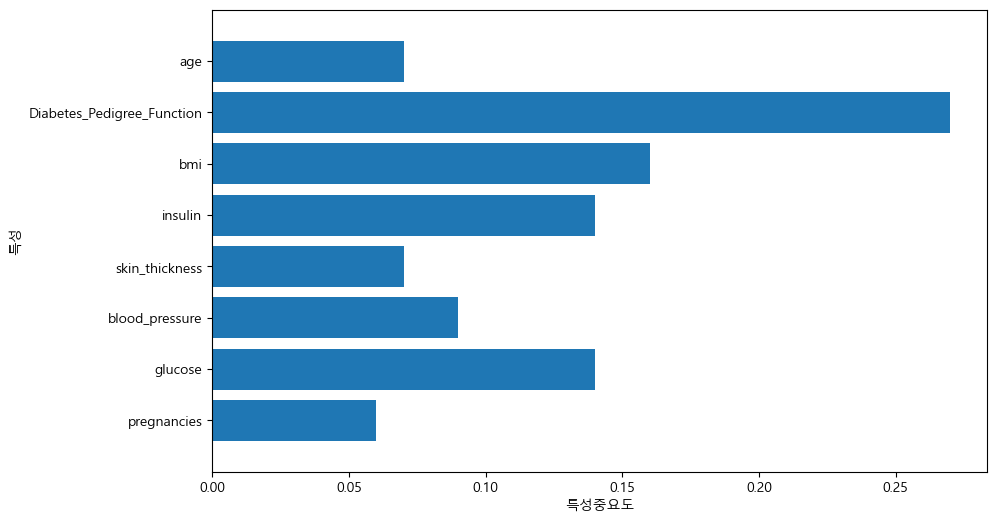

In [16]:
plot_tree(model_ada)

In [21]:
# algorithm : SAMME, SAMME.R(default = 'SAMME.R')
# SAMME.R : SAMME보다 빠르게 수렴되므로 부스팅 반복 횟수가 줄어 테스트 오류가 감소
from sklearn.svm import SVC
svc = SVC(probability=True, kernel='linear')
model_svc = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, base_estimator=svc)
model_svc.fit(X_train, y_train)
print(model_svc.predict(X_test))
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.7429906542056075
0.6851851851851852


[0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
0.9228971962616822
0.75


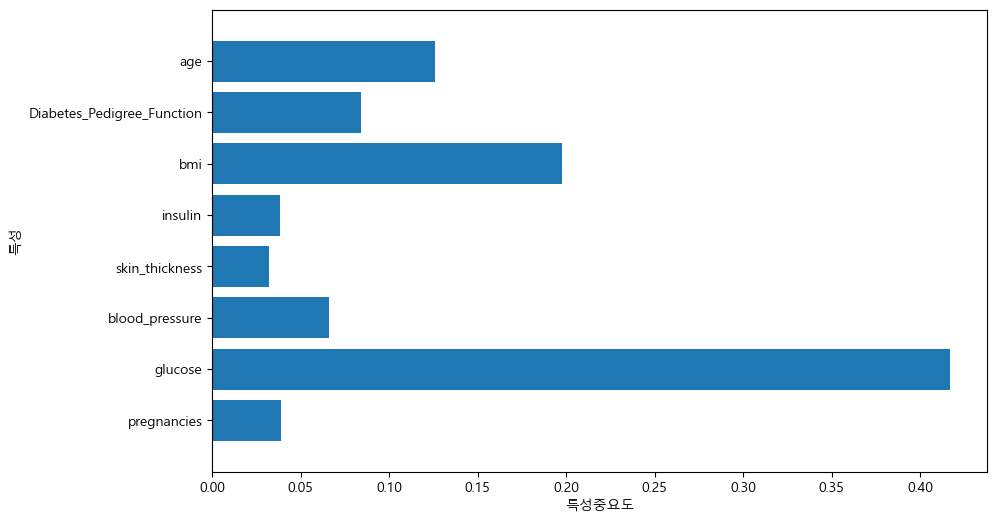

In [29]:
# 그레디언트 부스트: 손실을 최소화하는 개별 분류함수를 찾는 알고리즘
# 내부적으로 의사결정 회귀나무 모형을 사용함
from sklearn.ensemble import GradientBoostingClassifier
model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
model_grad.fit(X_train, y_train)
print(model_grad.predict(X_test))
print(model_grad.score(X_train, y_train))
print(model_grad.score(X_test, y_test))
plot_tree(model_grad)

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1]
0.9976635514018691
0.75


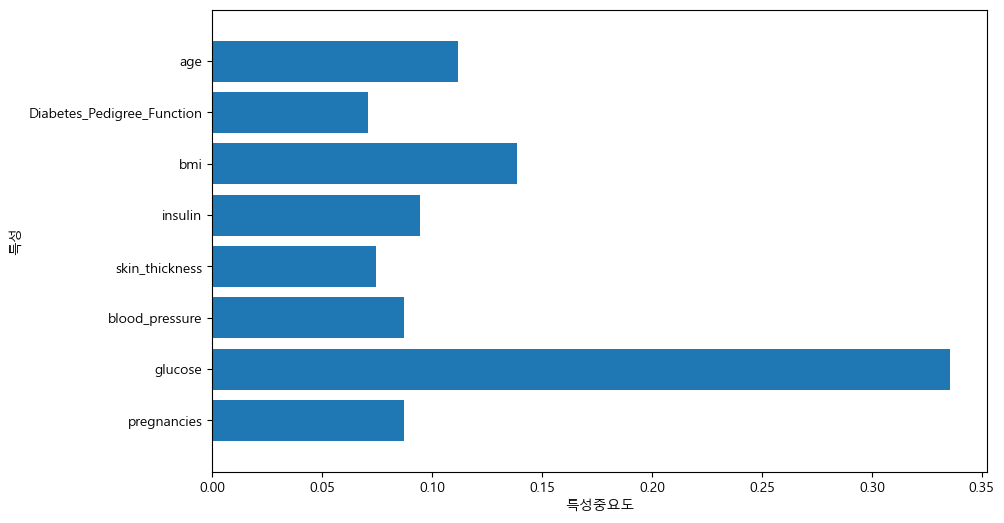

In [24]:
# XGBoost : 그레디언트 부스트 알고리즘을 분산환경에서도 실행할 수 있도록 구현된 라이브러리
# 성능이 우수하고 자원 활용률이 좋아서 최근 많이 사용되고 있는 알고리즘
# pip install xgboost
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=0)
model_xgb.fit(X_train, y_train)
print(model_xgb.predict(X_test))
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))
plot_tree(model_xgb)

[0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.8995327102803738
0.7685185185185185


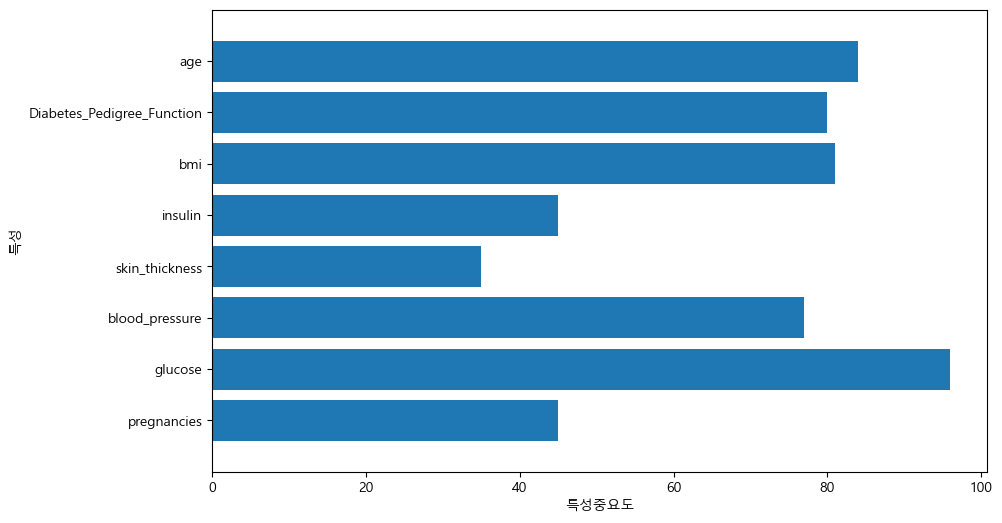

In [25]:
# GOSS(Gradient-based One-Side Sampling)을 통해 데이터의 일부만으로 빠르게 정보이득을 계산하고
# EFM(Exclusive Feature Bundling)을 통해 Feature를 획기적으로 감소시켜서 
# XGBoost보다 더 좋은 성능을 나타내는 알고리즘
# 정보이득(어떤 속성을 선택함으로 인하여 데이터를 더 잘 구분하게 되는 특성)
# 범주형 변수를 원핫인코딩을 하게 되면 변수가 많이 늘어나서 계산이 오래 걸리는 상황이 발생하는데
# lightgbm 알고리즘은 이 문제를 잘 극복할 수 있는 알고리즘
# pip install lightgbm
import lightgbm
model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=3, random_state=0)
model_lgbm.fit(X_train, y_train)
print(model_lgbm.predict(X_test))
print(model_lgbm.score(X_train, y_train))
print(model_lgbm.score(X_test, y_test))
plot_tree(model_lgbm)

In [26]:
for model in (model_ada, model_svc, model_grad, model_xgb, model_lgbm):
    print(model)
    model.fit(X_train, y_train)
    print("학습용 : ", model.score(X_train, y_train))
    print("학습용 : ", model.score(X_test, y_test))
    print()

AdaBoostClassifier(n_estimators=100, random_state=0)
학습용 :  0.8761682242990654
학습용 :  0.6944444444444444

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(kernel='linear', probability=True))
학습용 :  0.7429906542056075
학습용 :  0.6851851851851852

GradientBoostingClassifier(random_state=0)
학습용 :  0.9228971962616822
학습용 :  0.75

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estim